In [1]:
using Plots, TaylorSeries

### Método de Newton

En una variable: 

$$x_{n+1} = x_{n} - \dfrac{f(x_{n})}{f'(x_{n})}$$

En varias variables:

$$\vec{x_{n+1}} = \vec{x_{n}} - \left[\textbf{J}(\vec{x_{n}})\right]^{-1}F(\vec{x_{n}})$$


#### Ejemplo 1

$$g(u,\lambda) = (u^{2} -1)(u^{2}-4) + \lambda u^{2} e^{u/10}$$

In [2]:
function Newton(f,x::Taylor1,p,x0::Float64; ite = 100)
    x_new = x0
    i = 1
    while i < ite && f(x,p)(x_new) != 0.0
        x_old = x_new
        x_new = x_old - f(x,p)(x_old)/derivative(f(x,p))(x_old)
        i += 1
    end
    return x_new
end


Newton (generic function with 1 method)

In [3]:
u = Taylor1([0,1],20)
λ = 0.0;

In [4]:
g(u::Taylor1,λ) = (u^2 -1)*(u^2-4) + λ*u^2*exp(u/10)

g (generic function with 1 method)

In [5]:
u_cero = Newton(g,u,λ,-0.5)

-1.0

In [6]:
g(u,λ)(u_cero)

0.0

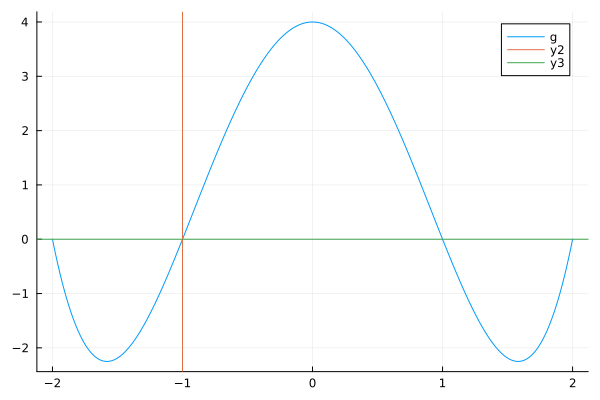

In [7]:
D = -2:0.01:2
plot(D,g(u,λ).(D), label = "g")
vline!([u_cero])
hline!([0.0])

In [39]:
function SF(f,x::Taylor1,X0::Vector{Float64},Λ0::Vector{Float64})
    N = length(X0)
    M = length(Λ0)
    #Λ = zeros(N*M)
    X = zeros(N*M)
    for i in 1:N
        x0 = X0[i]
        for j in 1:M
            k = (i-1)*j + j
            λ0 = Λ0[j]
            x0 = Newton(f,x,λ0,x0)
            #Λ[k] = λ0
            X[k] = (λ0,x0)
        end
    end
    return X
end

SF (generic function with 1 method)

In [40]:
X = SF(g,u,[-2.0,-1.0,1.0,2.0],Vector(0.0:0.01:1.0))

LoadError: MethodError: [0mCannot `convert` an object of type [92mTuple{Float64, Float64}[39m[0m to an object of type [91mFloat64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real
[0m[90m   @[39m [36mColorTypes[39m [90m~/.julia/packages/ColorTypes/7OlxI/src/[39m[90m[4mconversions.jl:114[24m[39m
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real
[0m[90m   @[39m [36mColorTypes[39m [90m~/.julia/packages/ColorTypes/7OlxI/src/[39m[90m[4mconversions.jl:113[24m[39m
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mtwiceprecision.jl:273[24m[39m
[0m  ...


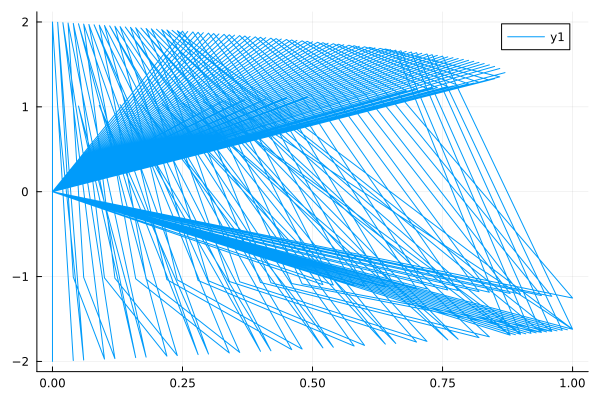

In [38]:
plot(x,y)

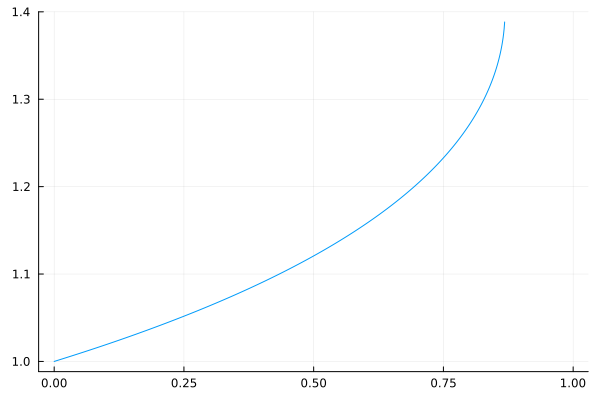

In [15]:
plot(0.0:0.001:0.999,Sf,leg = false)